In [33]:
 # 2. Build decision tree model to predict survival based on certain parameters (titanic.csv)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

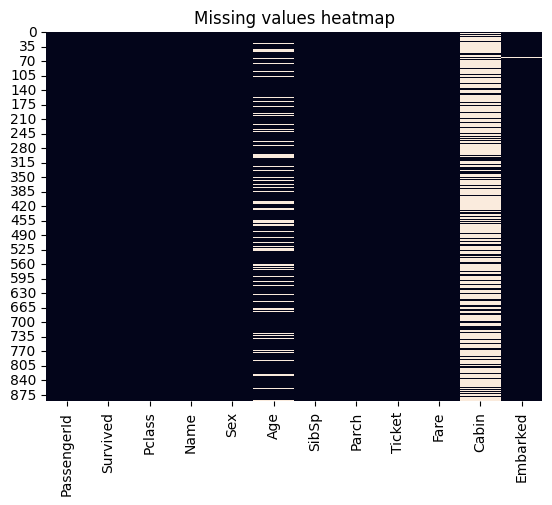

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [14]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='Pclass'>

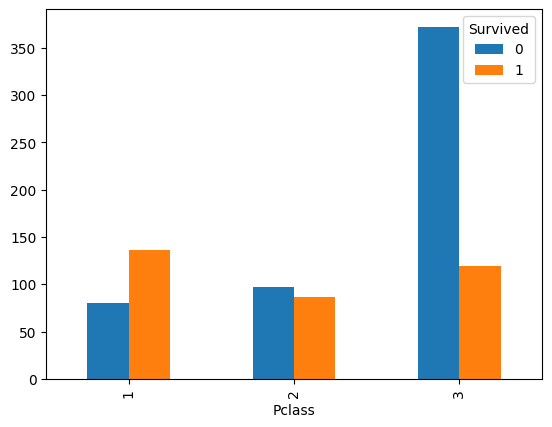

In [16]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar')

In [34]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
print(df['Embarked'].unique())
print(df[df['Embarked']=='S'].shape)
print(df[df['Embarked']=='C'].shape)
print(df[df['Embarked']=='Q'].shape)

['S' 'C' 'Q']
(646, 12)
(168, 12)
(77, 12)


In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
cor_df = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Sex','Embarked'])
cor_df.corr().style.background_gradient(cmap='Blues')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: xlabel='Survived'>

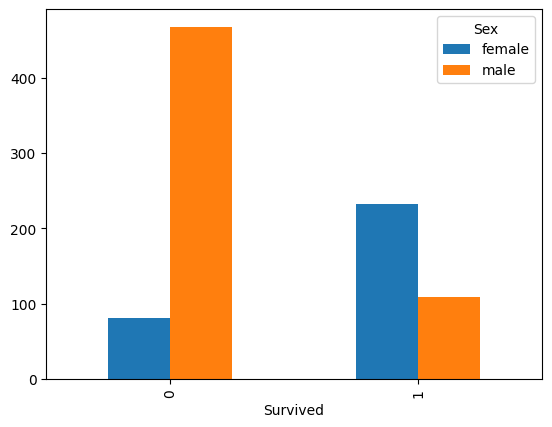

In [43]:
pd.crosstab(df['Survived'],df['Sex']).plot(kind='bar')

<Axes: xlabel='Survived'>

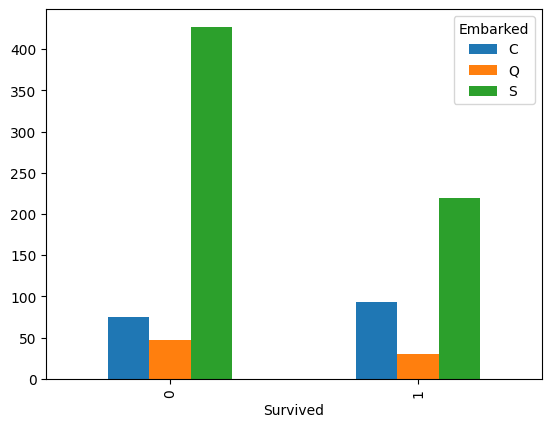

In [42]:
pd.crosstab(df['Survived'],df['Embarked']).plot(kind='bar')

In [90]:
df_1 = df.drop(columns=['PassengerId','Survived','Pclass','SibSp','Name','Ticket','Cabin'])

In [91]:
df_2 = pd.get_dummies(df_1,dtype = int)
df_2

,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,0,7.2500,0,1,0,0,1
1,38.000000,0,71.2833,1,0,1,0,0
2,26.000000,0,7.9250,1,0,0,0,1
3,35.000000,0,53.1000,1,0,0,0,1
4,35.000000,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,0,13.0000,0,1,0,0,1
887,19.000000,0,30.0000,1,0,0,0,1
888,29.699118,2,23.4500,1,0,0,0,1
889,26.000000,0,30.0000,0,1,1,0,0


In [92]:
X = df_2
Y = df['Survived']

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [98]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [99]:
model.score(X_test,Y_test)

0.8100558659217877

In [100]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()
reg_model.fit(X_train,Y_train)
reg_model.predict(X_test)
reg_model.score(X_test,Y_test)

0.8044692737430168

In [106]:
Age = int(input("Age : "))
Parch = int(input("Enter Parch : "))
Fare = float(input("Enter Fare :"))
Embarked = input('Enter Embarked at [C/Q/S] :' )
Gender = input("Enter Gender [Male/Female] :")
Female = 0
Male = 0
if Gender == "Male":
    Male,Female = 1,0
else:
    Male,Female = 0,1
if Embarked == "C":
    result = (model.predict([[Age,Parch,Fare,Female,Male,1,0,0]])[0])
elif Embarked == "S":
    result = (model.predict([[Age,Parch,Fare,Female,Male,0,0,1]])[0])
elif Embarked == "Q":
    result = (model.predict([[Age,Parch,Fare,Female,Male,0,1,0]])[0])
if result == 0:
    print("You Died")
else:
    print("Survived")

Age :  22
Enter Parch :  0
Enter Fare : 7.25
Enter Embarked at [C/Q/S] : S
Enter Gender [Male/Female] : Male


You Died
